# EDA

In [111]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
import pybingmaps
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import timeit

bing = pybingmaps.Bing('AizoCiuRwxjT9SjxftwCItVoRXI2v0V3UnLTKSebigC5GUW5NklrIZpL5jRANFuJ')

In [112]:
#Inicializacion de variables de tu posicion
my_latitude =20.677041
my_longuitud =-103.347745
my_location = (my_latitude, my_longuitud)
np_my_location_arr = np.array([my_latitude,my_longuitud])
df_my_location = pd.DataFrame({'Latitud': [my_latitude],'Longuitud': [my_longuitud]})
#np_my_location_arr

In [113]:
#Importando los datos y convirtiendolo en un dataframe
df_Hospitals = pd.read_excel("./Master_Dataset_AI_Saturday.xlsx")
#print(df_Hospitals)

In [153]:
df_Hospitals.head()

,AÑO,CLUES,CLAVE INSTITUCION,CLAVE MUNICIPIO,LATITUD,LONGITUD,DISTANCIA,TIEMPO TRANSLADO,NOMBRE DE LA UNIDAD,TOTAL DE CONSULTORIOS,TOTAL CAMAS AREA HOSPITALIZACIÓN,TOTAL CAMAS EN OTRAS AREAS (NO CONSIDERA HOSPITALIZACIÓN),TOTAL MEDICOS GENERALES Y ESPECIALISTAS,TOTAL DE ENFERMERAS EN CONTACTO CON EL PACIENTE,TOTAL DE URGENCIAS(AFECCIONES),EGRESOS HOSPITALARIOS,TOTAL CONSULTA EXTERNA ADULTOS Y PEDIATRIA 1RA VEZ Y SUBSECUENTE,NUMEROS DE PACIENTES POR HOSPITAL
0,2018,JCIMS000296,IMS,39,20.686922,-103.328075,2.32,4.64,BCO. SANGRE OBLATOS,0,0,0,4,5,NaN,NaN,NaN,NaN
1,2018,JCIMS001112,IMS,120,20.729193,-103.390566,0.91,1.82,C.C.S. MENTAL 1,15,160,0,9,2,NaN,NaN,NaN,NaN
2,2018,JCSSA013646,SSA,97,20.475000,-103.447000,0.08,0.16,CARAVANA DE LA SALUD TLAJOMULCO,0,0,0,2,1,NaN,NaN,NaN,NaN
3,2018,JCSSA009211,SSA,39,20.713143,-103.353109,4.05,8.10,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,2,0,0,0,0,NaN,NaN,NaN,NaN
4,2018,JCSSA013465,SSA,97,20.518600,-103.376000,8.78,17.56,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES NUEV...,2,0,0,0,0,NaN,NaN,NaN,NaN


In [114]:
#Verificar cuantos datos hay nulos
#coordinates_df.isnull().sum()

In [115]:
#Informacion General del dataframe
#df_Hospitals.describe()

<Figure size 3600x0 with 0 Axes>

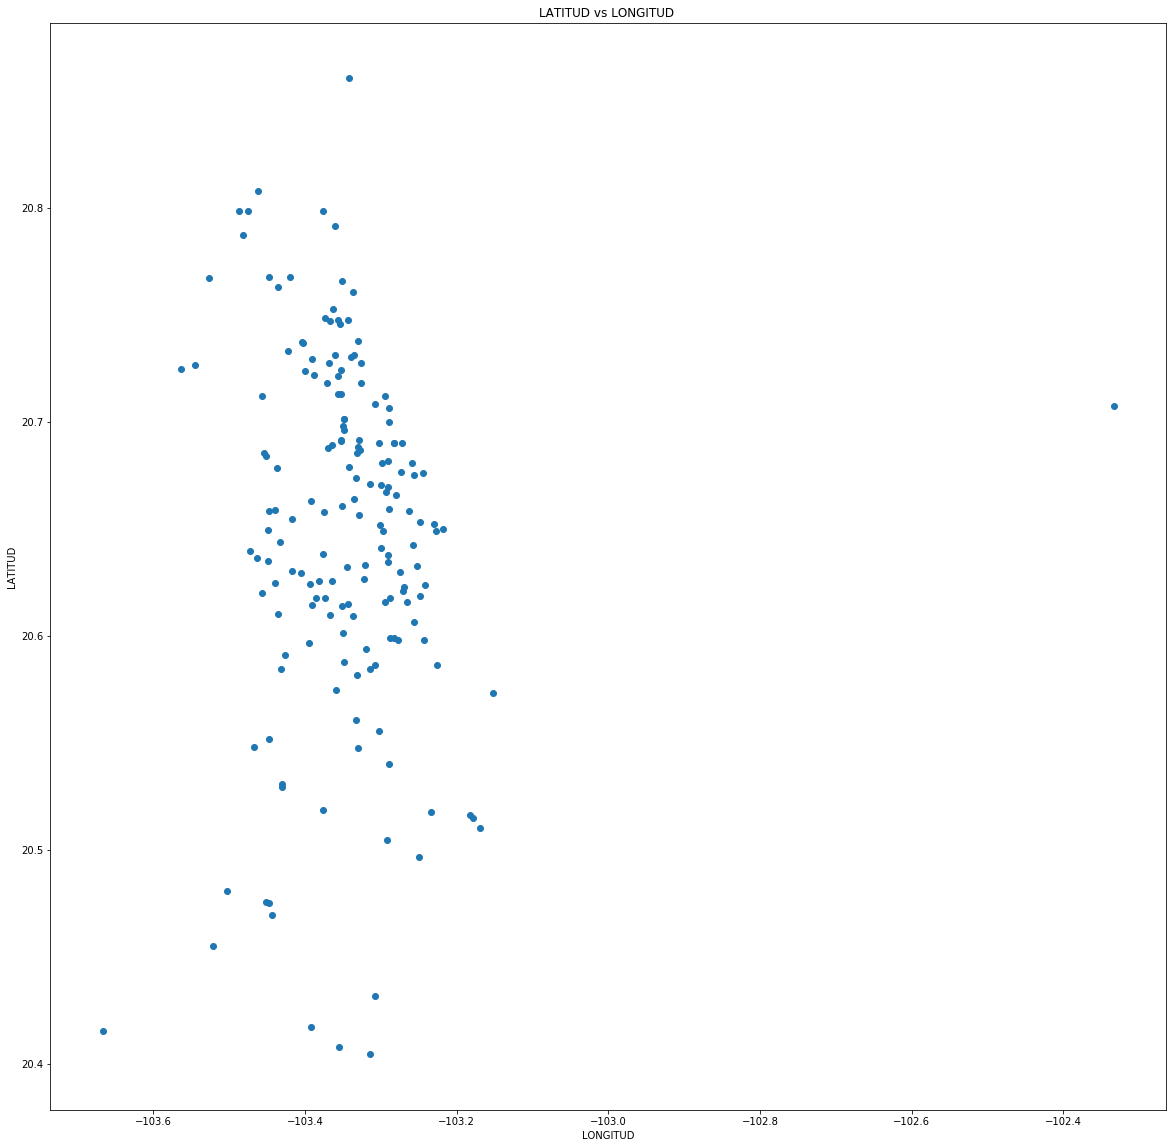

<Figure size 3600x0 with 0 Axes>

In [116]:
#Creando el plot
fig, ax = plt.subplots(figsize=(20, 20))
#Graficando Longitud es X axis axis en un mapa, Latitud es Y axis en un mapa y 
ax.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'])
#Configurando los titulos y etiquetas
ax.set_title('LATITUD vs LONGITUD ')
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')
plt.figure(figsize=(50,0))

# Implementacion Algoritmo Kmeans

In [117]:
#Juntando los datos de las localizaciones del hospital que nutren al algoritmo de Kmeans
df_LatitudHospitals = pd.DataFrame(df_Hospitals['LATITUD'])
df_LongitudHospitals = pd.DataFrame(df_Hospitals['LONGITUD'])
df_coordenadasHospitals = df_LatitudHospitals.join(df_LongitudHospitals)
print(df_coordenadasHospitals)

       LATITUD    LONGITUD
0    20.686922 -103.328075
1    20.729193 -103.390566
2    20.475000 -103.447000
3    20.713143 -103.353109
4    20.518600 -103.376000
..         ...         ...
167  20.415500 -103.666000
168  20.632400 -103.252000
169  20.683800 -103.451000
170  20.679007 -103.342022
171  20.798700 -103.487000

[172 rows x 2 columns]


In [118]:
# La documentacion de Kmeans se puede encontrar en: 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [119]:
#Se ejecutara 2 veces, la primera vez el algoritmo para conseguir los centros y la segunda vez para incluir la posicion
#en la que nos encontramos como un centro
tic=timeit.default_timer()
k_means1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
k_means1.fit(df_coordenadasHospitals)
y_kmeans1 = k_means1.predict(df_coordenadasHospitals)
toc=timeit.default_timer()
centers = k_means1.cluster_centers_
print(centers)
print("Tiempo Kmeans1:",toc-tic)

[[  20.5214185  -103.1943752 ]
 [  20.60999163 -103.3540474 ]
 [  20.67767389 -103.29757519]
 [  20.70747016 -102.3337922 ]
 [  20.73329309 -103.3620902 ]
 [  20.44737753 -103.33937322]
 [  20.49306025 -103.48094075]
 [  20.76540133 -103.48801712]
 [  20.61536479 -103.26556796]
 [  20.64080687 -103.43756186]]
Tiempo Kmeans1: 0.12342159099989658


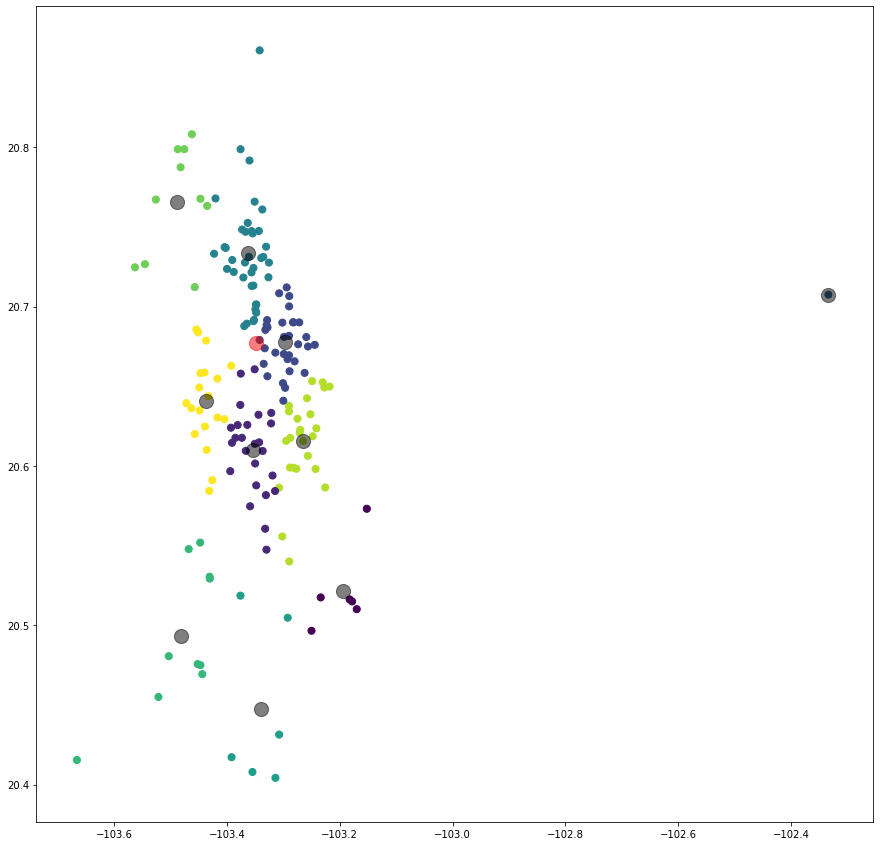

In [120]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans1, s=50, cmap='viridis')
centers1 = k_means1.cluster_centers_
plt.scatter(centers1[:, 1], centers1[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [121]:
newcenters = np.insert(centers, 0, np_my_location_arr, axis=0)
newcenters

array([[  20.677041  , -103.347745  ],
       [  20.5214185 , -103.1943752 ],
       [  20.60999163, -103.3540474 ],
       [  20.67767389, -103.29757519],
       [  20.70747016, -102.3337922 ],
       [  20.73329309, -103.3620902 ],
       [  20.44737753, -103.33937322],
       [  20.49306025, -103.48094075],
       [  20.76540133, -103.48801712],
       [  20.61536479, -103.26556796],
       [  20.64080687, -103.43756186]])

In [122]:
print(my_location)

(20.677041, -103.347745)


In [123]:
#https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
#https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering
tic=timeit.default_timer()
k_means2 = KMeans(init=newcenters, n_clusters=11, n_init=1, max_iter=1)
k_means2.fit(df_coordenadasHospitals)
y_kmeans2 = k_means2.predict(df_coordenadasHospitals)
toc=timeit.default_timer()
print("Tiempo Kmeans2", toc - tic)

Tiempo Kmeans2 0.01003695099984725


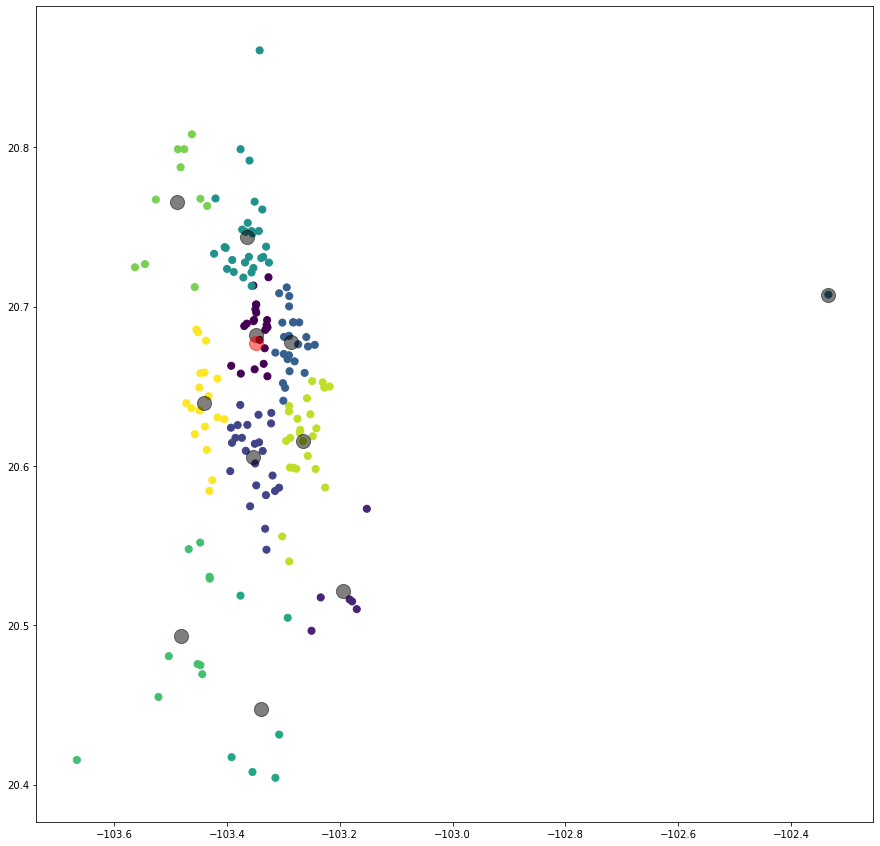

In [124]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans2, s=50, cmap='viridis')
centers2 = k_means2.cluster_centers_
plt.scatter(centers2[:, 1], centers2[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [125]:
df_Outputs_KMeans = pd.DataFrame(df_Hospitals['NOMBRE DE LA UNIDAD'])
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LATITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LONGITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(data=y_kmeans2, columns=["Center_Index"]))

In [126]:
closest_cluster_center = k_means2.predict(df_my_location)

In [127]:
LocateCenters = df_Outputs_KMeans.loc[df_Outputs_KMeans["Center_Index"] == closest_cluster_center[0]] 
LocateCenters = LocateCenters.reset_index()
LocateCenters = LocateCenters.drop(['index'], axis=1)
LocateCenters = LocateCenters.drop(['Center_Index'], axis=1)

In [128]:
tic=timeit.default_timer()
for i in LocateCenters.index:
    hospital_location = (LocateCenters.iat[i,1], LocateCenters.iat[i,2])
    LocateCenters.at[i, 'Tiempo_Estimado(seg)'] = bing.travelTime(my_location, hospital_location )
    LocateCenters.at[i, 'Distancia_Estimada(km)'] = bing.travelDistance(my_location, hospital_location)
toc=timeit.default_timer()
print("Tiempo API Bing:",toc-tic)

Tiempo API Bing: 8.870684624000205


In [129]:
print(my_location)

(20.677041, -103.347745)


# Evaluacion de Parametros

In [130]:
Hospitals_nearby_me = LocateCenters
Hospitals_nearby_me = LocateCenters.drop(['LATITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.drop(['LONGITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL DE CONSULTORIOS']))
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS
0,BCO. SANGRE OBLATOS,724.0,2.912,0,4
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,905.0,4.770,15,9
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,647.0,3.306,0,2
3,CENTRO DE SALUD GUADALAJARA 3,461.0,2.067,2,0
4,CENTRO DE SALUD N°1,523.0,2.286,2,0
5,CENTRO DE SALUD RANCHO NUEVO,1183.0,8.106,2,0
6,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,473.0,2.185,2,0
7,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,586.0,2.750,2,0
8,DR. ARTURO GLEZ. GUADALAJARA # 1,736.0,2.940,2,0
9,CLINICA DE MEDICINA FAMILIAR,797.0,3.295,2,0


In [131]:
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS
0,BCO. SANGRE OBLATOS,724.0,2.912,0,4
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,905.0,4.770,15,9
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,647.0,3.306,0,2
3,CENTRO DE SALUD GUADALAJARA 3,461.0,2.067,2,0
4,CENTRO DE SALUD N°1,523.0,2.286,2,0
5,CENTRO DE SALUD RANCHO NUEVO,1183.0,8.106,2,0
6,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,473.0,2.185,2,0
7,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,586.0,2.750,2,0
8,DR. ARTURO GLEZ. GUADALAJARA # 1,736.0,2.940,2,0
9,CLINICA DE MEDICINA FAMILIAR,797.0,3.295,2,0


In [132]:
#Preferencias Funcion de Evaluacion
#30% Tiempo de Traslado
#10% Distancia de Traslado
#10% Cantidad de Consultorios
#20% Cantidad de Medicos
#30% Ocupacion

Evaluacion_Hospitals_nearby_me = Hospitals_nearby_me

tic=timeit.default_timer()
'''
Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Tiempo_Estimado(seg)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Distancia'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Distancia_Estimada(km)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values
'''

Evaluacion_Hospitals_nearby_me['Ev_Consultorios'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL DE CONSULTORIOS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Medicos'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

'''
Evaluacion_Hospitals_nearby_me["Ev_Tiempo"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Tiempo"])+1
Evaluacion_Hospitals_nearby_me["Ev_Distancia"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Distancia"])+1
'''

Evaluacion_Hospitals_nearby_me["Calificacion"] =(
#                                                Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] * 0.3
#                                                +Evaluacion_Hospitals_nearby_me['Ev_Distancia']* 0.1
                                                Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

toc=timeit.default_timer()

Evaluacion_Hospitals_nearby_me["Ranking"] = Evaluacion_Hospitals_nearby_me['Calificacion'].rank(method='dense', ascending = False)

Evaluacion_Hospitals_nearby_me.head()

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,724.0,2.912,0,4,0.000000,0.375,0.075000,10.0
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,905.0,4.770,15,9,0.857143,0.875,0.260714,2.0
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,647.0,3.306,0,2,0.000000,0.125,0.025000,13.0
3,CENTRO DE SALUD GUADALAJARA 3,461.0,2.067,2,0,0.142857,0.000,0.014286,14.0
4,CENTRO DE SALUD N°1,523.0,2.286,2,0,0.142857,0.000,0.014286,14.0


In [133]:
print("Tiempo PercentilRank: ",toc - tic)

Tiempo PercentilRank:  0.02335379000010107


# ML and Training 

In [134]:
Evaluacion_Hospitals_2Train = Evaluacion_Hospitals_nearby_me
#Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Tiempo'], axis=1)
#Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Distancia'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Calificacion'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ranking'], axis=1)

In [135]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos
0,BCO. SANGRE OBLATOS,724.0,2.912,0,4,0.000000,0.375
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,905.0,4.770,15,9,0.857143,0.875
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,647.0,3.306,0,2,0.000000,0.125
3,CENTRO DE SALUD GUADALAJARA 3,461.0,2.067,2,0,0.142857,0.000
4,CENTRO DE SALUD N°1,523.0,2.286,2,0,0.142857,0.000
5,CENTRO DE SALUD RANCHO NUEVO,1183.0,8.106,2,0,0.142857,0.000
6,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,473.0,2.185,2,0,0.142857,0.000
7,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,586.0,2.750,2,0,0.142857,0.000
8,DR. ARTURO GLEZ. GUADALAJARA # 1,736.0,2.940,2,0,0.142857,0.000
9,CLINICA DE MEDICINA FAMILIAR,797.0,3.295,2,0,0.142857,0.000


In [136]:
Evaluacion_Hospitals_2Train["Calificacion"] =(Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

Evaluacion_Hospitals_2Train["Ranking"] = Evaluacion_Hospitals_2Train['Calificacion'].rank(method='dense', ascending = False)

In [137]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,724.0,2.912,0,4,0.000000,0.375,0.075000,10.0
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,905.0,4.770,15,9,0.857143,0.875,0.260714,2.0
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,647.0,3.306,0,2,0.000000,0.125,0.025000,13.0
3,CENTRO DE SALUD GUADALAJARA 3,461.0,2.067,2,0,0.142857,0.000,0.014286,14.0
4,CENTRO DE SALUD N°1,523.0,2.286,2,0,0.142857,0.000,0.014286,14.0
5,CENTRO DE SALUD RANCHO NUEVO,1183.0,8.106,2,0,0.142857,0.000,0.014286,14.0
6,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,473.0,2.185,2,0,0.142857,0.000,0.014286,14.0
7,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,586.0,2.750,2,0,0.142857,0.000,0.014286,14.0
8,DR. ARTURO GLEZ. GUADALAJARA # 1,736.0,2.940,2,0,0.142857,0.000,0.014286,14.0
9,CLINICA DE MEDICINA FAMILIAR,797.0,3.295,2,0,0.142857,0.000,0.014286,14.0


### Shuffling Data

In [138]:
from sklearn.model_selection import train_test_split

## Random Forest Regressor

In [139]:
X = pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL DE CONSULTORIOS'])
X = X.join(pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
y = Evaluacion_Hospitals_2Train['Calificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=417)

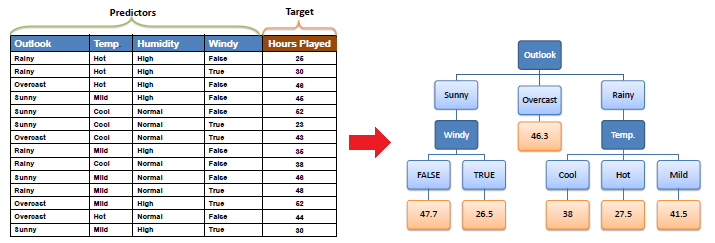

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

tic=timeit.default_timer()
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
toc=timeit.default_timer()
print("Random Forest Algorithm Time",toc - tic)

y_pred = pd.Series(y_pred)
df_y_pred = pd.DataFrame(y_pred)
df_y_test = pd.DataFrame(y_test)
df_y_test = df_y_test.reset_index()
df_y_test = df_y_test.drop(['index'], axis=1)

df_error = df_y_test.join(df_y_pred)
df_error = df_error.rename({"Calificacion": "y_test", 0: "y_pred"}, axis='columns')

for i in df_error.index:
    df_error.at[i, '% Error']  = abs(((df_error.iat[i,0] - df_error.iat[i,1])) / df_error.iat[i,0])*100

df_error["Rank_y_test"] = df_error['y_test'].rank(method='dense', ascending = False)
df_error["Rank_y_pred"] = df_error['y_pred'].rank(method='dense', ascending = False)
print(df_error)

Random Forest Algorithm Time 0.3017576929998995
      y_test    y_pred       % Error  Rank_y_test  Rank_y_pred
0   0.025000  0.050357  1.014286e+02          7.0          5.0
1   0.182143  0.143893  2.100000e+01          5.0          3.0
2   0.200000  0.157821  2.108929e+01          3.0          1.0
3   0.075000  0.086643  1.552381e+01          6.0          4.0
4   0.192857  0.143893  2.538889e+01          4.0          3.0
5   0.014286  0.014286  2.064321e-13          8.0          6.0
6   0.014286  0.014286  2.064321e-13          8.0          6.0
7   0.014286  0.014286  2.064321e-13          8.0          6.0
8   0.014286  0.014286  2.064321e-13          8.0          6.0
9   0.257143  0.143893  4.404167e+01          2.0          3.0
10  0.271429  0.150750  4.446053e+01          1.0          2.0


### Metrics

In [141]:
arr_y_test = df_error[["y_test"]].to_numpy()
arr_y_pred = df_error[["y_pred"]].to_numpy()

#Variance Score
variance_score = explained_variance_score(arr_y_test, arr_y_pred)
print("Variance Score:",variance_score)

#Mean Absolute Error
MAE = mean_absolute_error(arr_y_test, arr_y_pred)
print("Mean Absolute Error:",MAE)

#Root Mean Squared Error
RSME = mean_squared_error(arr_y_test, arr_y_pred, squared=False)
print("Root Mean Squared Error",RSME)

#R2
R2= r2_score(arr_y_test, arr_y_pred)
print("R2",R2)

Variance Score: 0.7860010058830786
Mean Absolute Error: 0.0363928571428572
Root Mean Squared Error 0.05543793957016074
R2 0.7001360605998266


## Multiple Linear Regression

In [142]:
from sklearn import linear_model

In [143]:
X2 = Evaluacion_Hospitals_2Train[['TOTAL DE CONSULTORIOS','TOTAL MEDICOS GENERALES Y ESPECIALISTAS']]
y2 = Evaluacion_Hospitals_2Train['Calificacion']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.50, random_state=417)

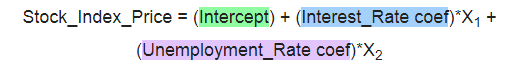

In [144]:
# Esto es lo que estamos haciendo
# Calificacion = (Intercept) + (TOTAL DE CONSULTORIOS coef)*X1 + (TOTAL MEDICOS GENERALES Y ESPECIALISTAS coef)*X2

tic=timeit.default_timer()
regr2 = linear_model.LinearRegression()
reg2 = regr2.fit(X2_train, y2_train)
y2_pred = reg2.predict(X2_test)
toc=timeit.default_timer()
print("Multiple Linear Regression Time",toc-tic)

score = reg2.score(X, y)
print(score)

Multiple Linear Regression Time 0.0065588090001256205
0.9824344786295336


In [145]:
y2_pred = pd.Series(y2_pred)
df_y2_pred = pd.DataFrame(y2_pred)
df_y2_test = pd.DataFrame(y2_test)
df_y2_test = df_y2_test.reset_index()
df_y2_test = df_y2_test.drop(['index'], axis=1)

df_error2 = df_y2_test.join(df_y2_pred)
df_error2 = df_error2.rename({"Calificacion": "y2_test", 0: "y2_pred"}, axis='columns')
for i in df_error2.index:
    df_error2.at[i, '% Error']  = abs(((df_error2.iat[i,0] - df_error2.iat[i,1])) / df_error2.iat[i,0])*100

df_error2["Rank_y_test"] = df_error2['y2_test'].rank(method='dense', ascending = False)
df_error2["Rank_y_pred"] = df_error2['y2_pred'].rank(method='dense', ascending = False)
print(df_error2)

     y2_test   y2_pred    % Error  Rank_y_test  Rank_y_pred
0   0.025000  0.037613  50.451636          7.0          7.0
1   0.182143  0.162332  10.876648          5.0          5.0
2   0.200000  0.236456  18.228180          3.0          3.0
3   0.075000  0.075117   0.155911          6.0          6.0
4   0.192857  0.174892   9.315227          4.0          4.0
5   0.014286  0.012492  12.553022          8.0          8.0
6   0.014286  0.012492  12.553022          8.0          8.0
7   0.014286  0.012492  12.553022          8.0          8.0
8   0.014286  0.012492  12.553022          8.0          8.0
9   0.257143  0.237340   7.701162          2.0          2.0
10  0.271429  0.262107   3.434282          1.0          1.0


### Metrics

In [146]:
arr_y2_test = df_error2[["y2_test"]].to_numpy()
arr_y2_pred = df_error2[["y2_pred"]].to_numpy()

#Variance Score
variance_score2 = explained_variance_score(arr_y2_test, arr_y2_pred)
print("Variance Score:",variance_score2)

#Mean Absolute Error
MAE2 = mean_absolute_error(arr_y2_test, arr_y2_pred)
print("Mean Absolute Error:",MAE2)

#Root Mean Squared Error
RSME2 = mean_squared_error(arr_y2_test, arr_y2_pred, squared=False)
print("Root Mean Squared Error",RSME2)

#R2
R2_2= r2_score(arr_y2_test, arr_y2_pred)
print("R2",R2_2)

Variance Score: 0.976592472081729
Mean Absolute Error: 0.011205462584870072
Root Mean Squared Error 0.015653350750416205
R2 0.9760930202225938


## Bayesian Ridge Regression

In [147]:
#https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression
from sklearn import linear_model

In [148]:
X3 = Evaluacion_Hospitals_2Train[['TOTAL DE CONSULTORIOS','TOTAL MEDICOS GENERALES Y ESPECIALISTAS']]
y3 = Evaluacion_Hospitals_2Train['Calificacion']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.50, random_state=417)

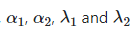

In [149]:
tic=timeit.default_timer()
regr3 = linear_model.BayesianRidge()
reg3 = regr3.fit(X3_train, y3_train)
y3_pred = reg3.predict(X3_test)
toc=timeit.default_timer()
print("Bayesian Ridge Regression",toc-tic)
regr3.coef_

Bayesian Ridge Regression 0.008479776000058337


array([0.00625839, 0.01861761])

In [150]:
y3_pred = pd.Series(y3_pred)
df_y3_pred = pd.DataFrame(y3_pred)
df_y3_test = pd.DataFrame(y3_test)
df_y3_test = df_y3_test.reset_index()
df_y3_test = df_y3_test.drop(['index'], axis=1)

df_error3 = df_y3_test.join(df_y3_pred)
df_error3 = df_error3.rename({"Calificacion": "y3_test", 0: "y3_pred"}, axis='columns')
for i in df_error3.index:
    df_error3.at[i, '% Error']  = abs(((df_error3.iat[i,0] - df_error3.iat[i,1])) / df_error3.iat[i,0])*100

df_error3["Rank_y_test"] = df_error3['y3_test'].rank(method='dense', ascending = False)
df_error3["Rank_y_pred"] = df_error3['y3_pred'].rank(method='dense', ascending = False)
print(df_error3)

     y3_test   y3_pred    % Error  Rank_y_test  Rank_y_pred
0   0.025000  0.037487  49.949006          7.0          7.0
1   0.182143  0.161867  11.131688          5.0          5.0
2   0.200000  0.237126  18.562773          3.0          2.0
3   0.075000  0.074722   0.370027          6.0          6.0
4   0.192857  0.174227   9.660331          4.0          4.0
5   0.014286  0.012769  10.618355          8.0          8.0
6   0.014286  0.012769  10.618355          8.0          8.0
7   0.014286  0.012769  10.618355          8.0          8.0
8   0.014286  0.012769  10.618355          8.0          8.0
9   0.257143  0.236338   8.090879          2.0          3.0
10  0.271429  0.261371   3.705308          1.0          1.0


### Metrics

In [151]:
arr_y3_test = df_error3[["y3_test"]].to_numpy()
arr_y3_pred = df_error3[["y3_pred"]].to_numpy()

#Variance Score
variance_score3 = explained_variance_score(arr_y3_test, arr_y3_pred)
print("Variance Score:",variance_score3)

#Mean Absolute Error
MAE3 = mean_absolute_error(arr_y3_test, arr_y3_pred)
print("Mean Absolute Error:",MAE3)

#Root Mean Squared Error
RSME3 = mean_squared_error(arr_y3_test, arr_y3_pred, squared=False)
print("Root Mean Squared Error",RSME3)

#R2
R2_3= r2_score(arr_y3_test, arr_y3_pred)
print("R2",R2_3)

Variance Score: 0.9754138278634888
Mean Absolute Error: 0.011429685775518707
Root Mean Squared Error 0.01605592422037518
R2 0.97484752649788
